<center><h1>XGBoost</h1></center>

# 1. Introduction

**XGBoost** (Extreme Gradient Boosting) is a powerful and efficient open-source implementation of the gradient boosting framework. It is designed for speed and performance, and often achieves superior results on structured/tabular data compared to other machine learning algorithms.

Originally developed by Tianqi Chen, XGBoost builds an ensemble of decision trees in a sequential manner, where each new tree aims to correct the errors of the previous ones. This boosting approach helps improve model accuracy significantly.

### Key Features of XGBoost:
- Regularization to prevent overfitting
- Parallel processing for faster training
- Tree pruning to optimize model complexity
- Built-in handling of missing values
- High scalability for large datasets

XGBoost has become a go-to tool for data scientists and has been widely used in machine learning competitions, especially on platforms like Kaggle.


![XGBoost](XGBoost.png)

# 2. How Does XGBoost Work?

**XGBoost** (Extreme Gradient Boosting) is a powerful and efficient implementation of the gradient boosting framework. It builds an ensemble of weak learners (usually decision trees) in a stage-wise manner, where each new tree is trained to correct the errors made by the existing ensemble.

## 2.1 Gradient Boosting Overview

Gradient boosting builds models sequentially, each trying to reduce the errors (residuals) of the combined model so far.

### Steps:
1. Start with an initial prediction (e.g., the average of the target values).
2. Compute the gradient (error) for each instance.
3. Fit a new decision tree to these gradients.
4. Add the new tree to the model with a scaling factor (learning rate).
5. Repeat steps 2–4 for several iterations.

This process allows the model to focus on the examples that previous models got wrong.

## 2.2 What Makes XGBoost Special?

XGBoost extends basic gradient boosting with several key innovations:

- **Regularization**: Adds $L1$ and $L2$ penalties to control overfitting.
- **Second-order optimization**: Uses both first-order (gradient) and second-order (Hessian) derivatives of the loss function for better accuracy.
- **Sparsity-aware**: Automatically handles missing values by learning the optimal split direction.
- **Parallelization**: Supports parallel tree construction, making it faster.
- **Pruning**: Uses a depth-first approach and prunes nodes that do not improve the objective.

## 2.3 XGBoost’s Objective Function

At each iteration, XGBoost aims to minimize the following regularized objective:

$$
\text{Obj} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{k=1}^{t} \Omega(f_k)
$$

Where:
- $l(y_i, \hat{y}_i^{(t)})$ is the loss function (e.g., squared error or logistic loss)
- $\hat{y}_i^{(t)}$ is the prediction at iteration $t$
- $\Omega(f_k)$ is the regularization term for the $k$-th tree

The regularization term is defined as:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_j w_j^2
$$

Where:
- $T$ is the number of leaves
- $w_j$ is the weight of leaf $j$
- $\gamma$ and $\lambda$ are regularization parameters

## 2.4 Tree Building in XGBoost

XGBoost builds trees by:
- Evaluating all possible feature splits
- Selecting the one with the highest **gain** in the objective
- Continuing until a stopping criterion is met (e.g., max depth or min gain)

The **gain** is calculated using both the gradient $g_i$ and the Hessian $h_i$:

$$
\text{Gain} = \frac{1}{2} \left[ \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda} \right] - \gamma
$$

Where:
- $G_L$, $H_L$: gradient and Hessian sums for the left child
- $G_R$, $H_R$: gradient and Hessian sums for the right child
- $\lambda$, $\gamma$: regularization terms

---

# 3. About the New York City Airbnb Dataset

### Context
Since 2008, guests and hosts have used Airbnb to expand traveling possibilities and provide a more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in New York City, NY for the year 2019.

### Content
This data file includes all the necessary information to learn more about hosts, geographical availability, and key metrics that enable us to make predictions and draw meaningful conclusions.

### Acknowledgements
This public dataset is part of Airbnb. The original source can be found on [this website](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data).

---


# 4. Steps to Apply XGBoost Algorithm to Dataset

## 4.1. Data Loading and Exploration
- Load the dataset into a pandas DataFrame.
- Perform an initial exploration of the dataset: check for missing values, data types, and the first few records.
- Visualize the distribution of key features like price, number of reviews, and room type.


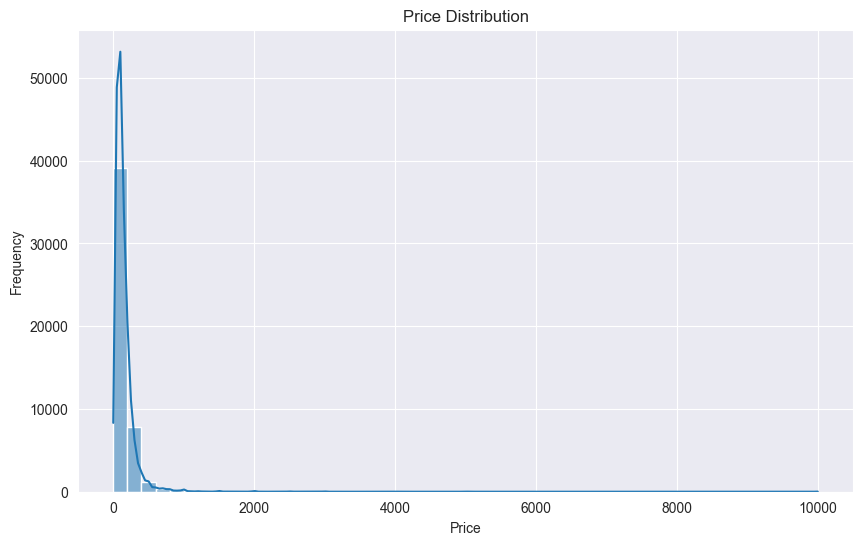

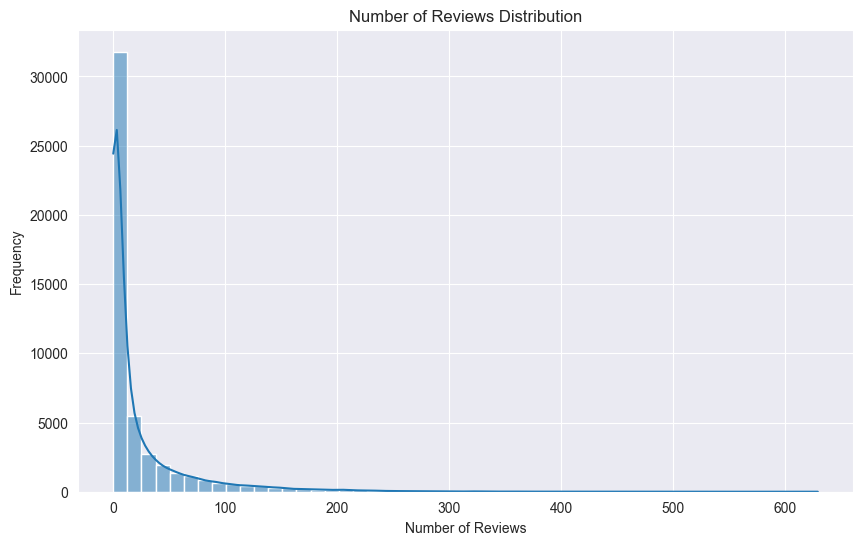

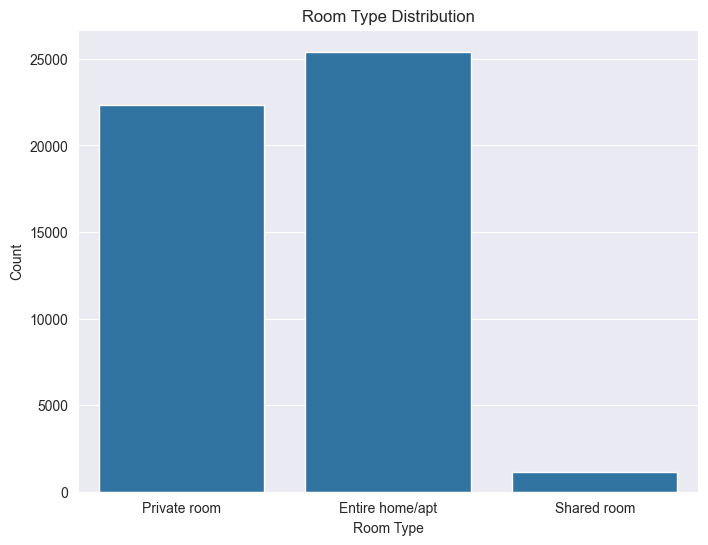

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'AB_NYC_2019.csv'
df = pd.read_csv(file_path)

df.head()

df.isnull().sum()

df.dtypes

df.describe()

# Distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'number_of_reviews'
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], bins=50, kde=True)
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'room_type' (categorical feature)
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

## 4.2. Data Preprocessing
- Handle missing values by filling, removing, or imputing data as needed.
- Encode categorical features such as 'room_type', 'neighbourhood', and 'host_name' using techniques like one-hot encoding or label encoding.
- Normalize or scale numerical features to improve model performance.
- Split the dataset into training and testing sets for model evaluation.



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# 1. Handle Missing Values
# Fill missing values for numerical columns with the median value
num_imputer = SimpleImputer(strategy='median')
df['reviews_per_month'] = num_imputer.fit_transform(df[['reviews_per_month']])

# Fill missing values for categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df['neighbourhood_group'] = cat_imputer.fit_transform(df[['neighbourhood_group']]).ravel()
df['neighbourhood'] = cat_imputer.fit_transform(df[['neighbourhood']]).ravel()
df['host_name'] = cat_imputer.fit_transform(df[['host_name']]).ravel()

# 2. Encode Categorical Variables
# One-hot encoding for 'room_type' and 'neighbourhood'
df = pd.get_dummies(df, columns=['room_type', 'neighbourhood'], drop_first=True)

# Label encoding for 'neighbourhood_group' (you can also use one-hot encoding if needed)
label_encoder = LabelEncoder()
df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])

# 3. Convert 'last_review' (datetime) into number of days since last review
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['days_since_last_review'] = (pd.to_datetime('today') - df['last_review']).dt.days
df['days_since_last_review'].fillna(df['days_since_last_review'].max())  # Fill NaN values

# Drop the original 'last_review' column if it's no longer needed
df.drop(columns=['last_review'], inplace=True)

# 4. Ensure all data is numeric (check data types)
print(df.dtypes)  # Verify that all columns are numeric

X = df.drop(columns=['price'])  # Features (exclude the target column 'price')
y = df['price']  # Target column 'price'


id                           int64
name                        object
host_id                      int64
host_name                   object
neighbourhood_group          int64
                            ...   
neighbourhood_Woodhaven       bool
neighbourhood_Woodlawn        bool
neighbourhood_Woodrow         bool
neighbourhood_Woodside        bool
days_since_last_review     float64
Length: 236, dtype: object


## 4.3. Train XGBoost Model
- Define the target variable (`price`) and feature variables (e.g., room type, neighborhood, etc.).
- Initialize the XGBoost model with appropriate hyperparameters.
- Train the model on the training dataset and monitor performance using cross-validation.


In [51]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Drop non-informative columns (e.g., 'name', 'host_name') from the dataset
cols_to_drop = ['name', 'host_name']  # List of columns you want to drop
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])  # Drop only existing columns

# Clean column names (remove leading/trailing spaces if any)
df.columns = df.columns.str.strip()

# Check if the columns for encoding exist
categorical_cols = ['neighbourhood_group', 'room_type']

# Print out columns to make sure they are correct
print(f"Available columns in the dataset: {df.columns.tolist()}")

# Encode categorical features using OneHotEncoder
if all(col in df.columns for col in categorical_cols):  # Check if all columns exist
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
    X_encoded = encoder.fit_transform(df[categorical_cols])

    # Replace categorical columns with encoded values
    encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
    df = df.drop(columns=categorical_cols)  # Drop the original categorical columns
    df = pd.concat([df, encoded_df], axis=1)  # Concatenate the encoded columns back
else:
    print(f"Some of the specified columns are missing: {set(categorical_cols) - set(df.columns)}")

# Split data into features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Define the model parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # RMSE for regression
    'max_depth': 6,  # Maximum depth of each tree
    'learning_rate': 0.1,  # Step size for boosting
    'n_estimators': 100,  # Number of boosting rounds (trees)
    'colsample_bytree': 0.8,  # Fraction of features used for each tree
    'subsample': 0.8,  # Fraction of data used for each tree
    'gamma': 0,  # Regularization parameter
    'random_state': 42  # Ensure reproducibility
}

# Train the model using cross-validation
cv_results = xgb.cv(
    params=params,
    dtrain=train_dmatrix,
    num_boost_round=1000,
    early_stopping_rounds=10,
    nfold=5,  # 5-fold cross-validation
    metrics="rmse",
    as_pandas=True,
    seed=42
)

# Display cross-validation results
print(cv_results)

# Extract the best number of boosting rounds from the cross-validation results
best_num_rounds = cv_results['test-rmse-mean'].idxmin()

# Train the final model with the optimal number of boosting rounds
model = xgb.train(
    params=params,
    dtrain=train_dmatrix,
    num_boost_round=best_num_rounds
)

# Predict on the test data
y_pred = model.predict(test_dmatrix)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display performance metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


Available columns in the dataset: ['id', 'host_id', 'neighbourhood_group', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'room_type_Private room', 'room_type_Shared room', 'neighbourhood_Arden Heights', 'neighbourhood_Arrochar', 'neighbourhood_Arverne', 'neighbourhood_Astoria', 'neighbourhood_Bath Beach', 'neighbourhood_Battery Park City', 'neighbourhood_Bay Ridge', 'neighbourhood_Bay Terrace', 'neighbourhood_Bay Terrace, Staten Island', 'neighbourhood_Baychester', 'neighbourhood_Bayside', 'neighbourhood_Bayswater', 'neighbourhood_Bedford-Stuyvesant', 'neighbourhood_Belle Harbor', 'neighbourhood_Bellerose', 'neighbourhood_Belmont', 'neighbourhood_Bensonhurst', 'neighbourhood_Bergen Beach', 'neighbourhood_Boerum Hill', 'neighbourhood_Borough Park', 'neighbourhood_Breezy Point', 'neighbourhood_Briarwood', 'neighbourhood_Brighton Beach', 'neighbourhood_Bronxdale', 'neighbourhood_Brooklyn 

C:\Users\thinkbook14\miniconda3\Lib\site-packages\xgboost\training.py:209: UserWarning: [02:11:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
C:\Users\thinkbook14\miniconda3\Lib\site-packages\xgboost\training.py:215: UserWarning: [02:11:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         241.304064        3.144116      243.571641      11.814841
1         237.196639        3.483915      242.030729      11.767773
2         233.089344        3.667588      239.971770      12.031016
3         229.314766        3.779720      238.413133      12.139299
4         225.715479        3.469233      236.785685      12.073633
..               ...             ...             ...            ...
128       133.793505        3.535116      222.287880      12.831638
129       133.451208        3.534239      222.291435      12.838400
130       133.135814        3.557117      222.312124      12.807152
131       132.865561        3.518886      222.267633      12.770069
132       132.443626        3.498891      222.176855      12.937111

[133 rows x 4 columns]


C:\Users\thinkbook14\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:11:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


MAE: 62.4056396484375
MSE: 38316.8515625
RMSE: 195.74690690404282
R^2: 0.1338523030281067


## 4.4. Hyperparameter Tuning
- Perform hyperparameter tuning using techniques such as grid search or random search to find the optimal settings for the model (e.g., learning rate, max depth, number of estimators).


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Simplified parameter grid
param_grid = {
    'learning_rate': [0.05, 0.1],        # 2 choices
    'max_depth': [4, 6],                 # 2 choices
    'n_estimators': [100, 150],          # 2 choices
    'subsample': [0.8, 1.0],             # 2 choices
    'colsample_bytree': [0.8, 1.0],      # 2 choices
}

# XGBoost model (add tree_method='gpu_hist' if GPU is configured)
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Custom scoring function: negative mean squared error (lower is better)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring=scorer,
    verbose=1
)

# Start hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Score (Negative MSE): {best_score}")

# Use the best model to predict the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8}
Best Cross-validation Score (Negative MSE): -52132.134375
MAE: 61.74368667602539
MSE: 36699.6640625
RMSE: 191.57156381493576
R^2: 0.17040860652923584


## 4.5. Model Evaluation
- Evaluate the model's performance using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R².
- Analyze feature importance to understand which variables have the most impact on price prediction.

After training the XGBoost regressor with the best hyperparameters obtained through Grid Search, we evaluated the model's performance using standard regression metrics:

### Best Hyperparameters

```python
{
    'colsample_bytree': 0.8,
    'learning_rate': 0.05,
    'max_depth': 6,
    'n_estimators': 150,
    'subsample': 0.8
}

## 4.6. Model Interpretation
- Interpret the model's predictions and feature importance.
- Discuss potential improvements or further experiments to enhance model accuracy.

After evaluating the model performance, it is important to understand how the model makes predictions and which features contribute most to those predictions.

### Feature Importance

We use XGBoost's built-in `plot_importance` function to visualize the top contributing features:

```python
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(best_model, max_num_features=20, height=0.5)
plt.title("Top 20 Feature Importances")
plt.show()

## 4.7. Conclusion
- Summarize the key findings from applying the XGBoost model to the dataset.
- Provide recommendations for potential future work or use cases for the model.

### Summary of Findings

In this project, we applied the XGBoost regression model to predict Airbnb listing prices in New York City using a range of features such as location, room type, minimum nights, and review counts. After data preprocessing and hyperparameter tuning, we achieved the following model performance on the test set:

- **Mean Absolute Error (MAE)**: ~61.74
- **Mean Squared Error (MSE)**: ~36,699.66
- **Root Mean Squared Error (RMSE)**: ~191.57
- **R² Score**: ~0.17

These results indicate that the model captures some patterns in the data but still leaves room for improvement. Feature importance analysis revealed that location (latitude and longitude), number of reviews, and room type are among the most influential predictors.

### Recommendations for Future Work

To improve model performance and generalizability, the following steps are recommended:

- **Enhanced Feature Engineering**: Create composite or derived features (e.g., price per night, host experience, spatial clusters).
- **Outlier Treatment**: Remove or transform extreme values in variables like `price`, `minimum_nights`, or `reviews`.
- **Use of Temporal Information**: Incorporate booking date or listing age to capture seasonal trends.
- **Geospatial Modeling**: Explore spatial clustering or distance-based features (e.g., distance to city center or landmarks).
- **Model Comparison**: Evaluate alternative algorithms such as LightGBM, CatBoost, or deep neural networks.
- **Production Deployment**: With improved accuracy, the model could serve as a pricing assistant for hosts or a validation system for pricing anomalies.

In conclusion, XGBoost provides a strong baseline model for predicting Airbnb prices, and with further refinement, it could be used in real-world pricing tools or market analytics platforms.
